In [1]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

df = pd.read_csv('UCI_Smartphone_Raw.csv')

# turn label into 0 for the first label 
df.loc[:, "label"] = df["label"].apply(lambda x: x - 1)
# acc
df['body_acc_x'] = df['body_acc_x'].apply(lambda x: np.array(x.replace('  ', ' ').strip().split(' '), dtype='f'))
df['body_acc_y'] = df['body_acc_y'].apply(lambda x: np.array(x.replace('  ', ' ').strip().split(' '), dtype='f'))
df['body_acc_z'] = df['body_acc_z'].apply(lambda x: np.array(x.replace('  ', ' ').strip().split(' '), dtype='f'))
# gyro
df['body_gyro_x'] = df['body_gyro_x'].apply(lambda x: np.array(x.replace('  ', ' ').strip().split(' '), dtype='f'))
df['body_gyro_y'] = df['body_gyro_y'].apply(lambda x: np.array(x.replace('  ', ' ').strip().split(' '), dtype='f'))
df['body_gyro_z'] = df['body_gyro_z'].apply(lambda x: np.array(x.replace('  ', ' ').strip().split(' '), dtype='f'))
# total acc
df['total_acc_x'] = df['total_acc_x'].apply(lambda x: np.array(x.replace('  ', ' ').strip().split(' '), dtype='f'))
df['total_acc_y'] = df['total_acc_y'].apply(lambda x: np.array(x.replace('  ', ' ').strip().split(' '), dtype='f'))
df['total_acc_z'] = df['total_acc_z'].apply(lambda x: np.array(x.replace('  ', ' ').strip().split(' '), dtype='f'))

In [2]:
is1=(df['subject'] == 1)
df = df[is1]

In [3]:
df.reset_index(drop=True,inplace=True)
df

,subject,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z,label
0,1,"[0.0001808515, 0.01013856, 0.009275574, 0.0050...","[0.01076681, 0.00657948, 0.008928878, 0.007488...","[0.05556068, 0.05512483, 0.04840473, 0.0497749...","[0.03019122, 0.04371071, 0.0356878, 0.0404021,...","[0.06601362, 0.04269897, 0.07485018, 0.0573197...","[0.02285864, 0.01031572, 0.01324969, 0.0177512...","[1.012817, 1.022833, 1.022028, 1.017877, 1.023...","[-0.1232167, -0.1268756, -0.1240037, -0.124927...","[0.1029341, 0.1056872, 0.1021025, 0.1065527, 0...",4
1,1,"[0.001093752, 0.004550077, 0.002879173, 0.0022...","[-0.004687588, -0.007487894, -0.008429991, -0....","[-0.02685954, -0.02509841, -0.02597534, -0.026...","[0.01711106, 0.02417851, 0.03022889, 0.0320285...","[0.006122797, 0.009710357, 0.01032192, 0.01341...","[0.01226815, 0.01614958, 0.01589471, 0.0126711...","[1.018851, 1.02238, 1.020781, 1.020218, 1.0213...","[-0.123976, -0.1268078, -0.1277862, -0.1266547...","[0.09792958, 0.09935086, 0.09811381, 0.0975171...",4
2,1,"[0.003531266, 0.002285063, -0.0004197538, -0.0...","[0.004455942, 0.003045876, 0.001776179, 0.0009...","[-0.005914581, -0.004138911, -0.0005428851, 0....","[0.02618877, 0.02165149, 0.01455062, 0.0148146...","[-0.000238341, -0.0004275982, 0.000761135, -0....","[0.002158897, -0.0002724752, 0.002630986, 0.00...","[1.023127, 1.021882, 1.019178, 1.015861, 1.012...","[-0.1200157, -0.1214994, -0.1228407, -0.123717...","[0.09111667, 0.0926756, 0.09606378, 0.09989713...",4
3,1,"[-0.001772352, -0.001311448, 0.0003876795, 0.0...","[-0.01018541, -0.01125254, -0.0121963, -0.0111...","[0.001053255, 0.001227295, -0.006004362, -0.00...","[-0.03751574, -0.033097, -0.03036013, -0.02500...","[-0.01288632, -0.01691822, -0.01618518, -0.012...","[-0.0008727416, -0.00548197, -0.00467823, -0.0...","[1.017682, 1.018149, 1.019854, 1.01988, 1.0191...","[-0.1334039, -0.1343639, -0.1352028, -0.134048...","[0.0951518, 0.09541539, 0.08827355, 0.08632477...",4
4,1,"[8.747685e-05, -0.0002719175, 0.001022103, 0.0...","[-0.003856929, -0.002837935, -0.003086418, -0....","[-0.01333336, -0.01494756, -0.01567863, -0.009...","[-0.01942932, -0.01909099, -0.01481631, -0.013...","[-0.008612378, -0.008146719, -0.00537662, -0.0...","[-0.00157401, 0.0002007077, -0.0009700938, -0....","[1.019952, 1.019616, 1.020933, 1.023061, 1.022...","[-0.1287306, -0.1278461, -0.12823, -0.1298541,...","[0.0808414, 0.07912684, 0.07829138, 0.08406305...",4
...,...,...,...,...,...,...,...,...,...,...,...
342,1,"[-0.1311812, -0.1592935, -0.2771084, -0.318961...","[0.005128329, 0.03219192, 0.04382707, 0.028594...","[-0.02085472, -0.009239075, 0.05543697, 0.1040...","[-1.730218, -1.701886, -1.6575, -1.658881, -1....","[0.3738743, 0.8231796, 0.8812421, 0.588169, 0....","[0.3273251, 0.243904, 0.09290635, -0.02274334,...","[0.8562004, 0.828793, 0.7117176, 0.6706224, 0....","[-0.277932, -0.2507964, -0.2390771, -0.2542128...","[-0.1285938, -0.1178752, -0.05406389, -0.00630...",2
343,1,"[-0.1578029, -0.2613587, -0.3170717, -0.352164...","[0.08044868, 0.1775973, 0.2190268, 0.1592849, ...","[0.1026365, 0.1094449, 0.08498063, 0.1191908, ...","[0.03373377, -0.233273, -0.5284829, -0.5655674...","[0.07919711, 0.1571578, 0.2954176, 0.1399548, ...","[0.1974651, 0.4254131, 0.7045803, 0.6979726, 0...","[0.8292377, 0.7257007, 0.6701163, 0.6352396, 0...","[-0.1928435, -0.09581949, -0.05456777, -0.1145...","[-0.02288157, -0.01659344, -0.04154296, -0.007...",2
344,1,"[-0.4671955, -0.4163292, -0.4484483, -0.558497...","[0.02614819, 0.03636393, 0.08416436, 0.1000068...","[0.08631493, 0.1397775, 0.1482707, 0.154297, 0...","[-0.009345836, 0.1243494, 0.06668596, -0.10990...","[-0.2258731, -0.3022084, -0.5898633, -0.860155...","[0.3132447, -0.03264395, -0.1629406, 0.0961429...","[0.5127361, 0.5643144, 0.5329149, 0.4235671, 0...","[-0.2546354, -0.2445012, -0.1967827, -0.181019...","[-0.03260685, 0.02048857, 0.02866, 0.0344147, ...",2
345,1,"[-0.04538055, -0.009866225,

In [4]:
def make_data(num) :#num에 subject
    scaler = MinMaxScaler()
    is1 = (df['subject'] == num)
    datalist = df[is1]
    datalist.reset_index(drop=True,inplace=True)
    
    for i in range(1,10):
        globals()['sensor{}_{}'.format(num,i)] = [] #sensor{sub}_{sensor종류 1~9} 
        globals()['polar{}_{}'.format(num,i)] = []
        
        for j in range(len(datalist)):
            globals()['sensor{}_{}'.format(num,i)].append(datalist.iloc[:,i][j])#i가 센서의 종류, j는 셀번호
            
        globals()['sensor{}_{}'.format(num,i)] = pd.DataFrame(globals()['sensor{}_{}'.format(num,i)]).apply(pd.to_numeric).transpose()
        globals()['sensor{}_{}'.format(num,i)][:] = scaler.fit_transform(globals()['sensor{}_{}'.format(num,i)][:])
        globals()['sensor{}_{}'.format(num,i)] = pd.DataFrame(globals()['sensor{}_{}'.format(num,i)]).apply(pd.to_numeric).transpose()
               
        
    
    for l in range(1,8,3) :
        for q in range(len(globals()['sensor{}_{}'.format(num,l)])) :
            valuex,valuey,valuez = [],[],[]  
            for k in range(128):
                xy = globals()['sensor{}_{}'.format(num,l)][k][q]**2 +  globals()['sensor{}_{}'.format(num,l+1)][k][q]**2
                valuex.append(np.sqrt(xy+ globals()['sensor{}_{}'.format(num,l+2)][k][q]**2))
                valuey.append(np.arctan2(np.sqrt(xy), globals()['sensor{}_{}'.format(num,l+2)][k][q]))
                valuez.append(np.arctan2( globals()['sensor{}_{}'.format(num,2)][k][q], globals()['sensor{}_{}'.format(num,l)][k][q]))
            globals()['polar{}_{}'.format(num,l)].append(valuex)
            globals()['polar{}_{}'.format(num,l+1)].append(valuey)
            globals()['polar{}_{}'.format(num,l+2)].append(valuez)


In [5]:
def make_images(num) :
    globals()['mergegasf{}'.format(num)]=[]
    globals()['mergegadf{}'.format(num)]=[]
    for l in range(1,8,3):
        X = globals()['polar{}_{}'.format(num,l)]
        Y = globals()['polar{}_{}'.format(num,l+1)]
        Z = globals()['polar{}_{}'.format(num,l+2)]
        Xgasf = GramianAngularField(image_size=24, method='summation')
        Xgasf = Xgasf.fit_transform(X)
        Xgadf = GramianAngularField(image_size=24, method='difference')
        Xgadf = Xgadf.fit_transform(X) 
        Ygasf = GramianAngularField(image_size=24, method='summation')
        Ygasf = Ygasf.fit_transform(Y)
        Ygadf = GramianAngularField(image_size=24, method='difference')
        Ygadf = Ygadf.fit_transform(Y) 
        Zgasf = GramianAngularField(image_size=24, method='summation')
        Zgasf = Zgasf.fit_transform(Z)
        Zgadf = GramianAngularField(image_size=24, method='difference')
        Zgadf = Zgadf.fit_transform(Z)
        globals()['mergegasf{}'.format(num)].append(Xgasf)
        globals()['mergegasf{}'.format(num)].append(Ygasf)
        globals()['mergegasf{}'.format(num)].append(Zgasf)
        globals()['mergegadf{}'.format(num)].append(Xgadf) 
        globals()['mergegadf{}'.format(num)].append(Ygadf) 
        globals()['mergegadf{}'.format(num)].append(Zgadf) 

In [6]:
make_data(1)

In [7]:
for i in range(1,31):
    make_data(i)
    make_images(i)
    print(f'complete{i}')

complete1
complete2
complete3
complete4
complete5
complete6
complete7
complete8
complete9
complete10
complete11
complete12
complete13
complete14
complete15
complete16
complete17
complete18
complete19
complete20
complete21
complete22
complete23
complete24
complete25
complete26
complete27
complete28
complete29
complete30


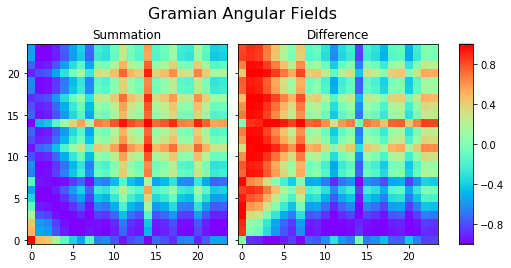

In [8]:
def show_image(images):
    fig = plt.figure(figsize=(8, 4))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 2),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.3,
                     ) 
    titles = ['Summation', 'Difference']
    for image, title, ax in zip(images, titles, grid):
        im = ax.imshow(image, cmap='rainbow', origin='lower')
        ax.set_title(title, fontdict={'fontsize': 12})
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
    plt.show()

images = [mergegasf1[0][0],mergegadf1[0][0]]
show_image(images)   

In [9]:
for i in range(1,31):
    globals()['mergegasf{}'.format(i)] = np.transpose(globals()['mergegasf{}'.format(i)],(1,2,3,0))
    globals()['mergegadf{}'.format(i)] = np.transpose(globals()['mergegadf{}'.format(i)],(1,2,3,0))
len(mergegasf1) #절대 다시돌리면안돼

347

In [10]:
import os
import tensorflow as tf
from tensorflow import reshape
from collections import OrderedDict
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from sklearn.metrics import accuracy_score

In [11]:
def make_client(sub):

    X, Y = [],[]
    X = (globals()['mergegasf{}'.format(sub)])
    is1 = (df['subject'] == sub)
    datalist = df[is1]['label']
    datalist.reset_index(drop=True,inplace=True)
    Y = datalist
    target = Y #onehot
    num = np.unique(target, axis=0)
    num = num.shape[0]
    Y = np.eye(num)[target]
    dataset = tf.data.Dataset.from_tensor_slices((list(X), list(Y)))
    
    return dataset.shuffle(len(Y)).batch(32)#원래는 64

In [12]:
clients_batched = dict()
for i in range(1,25):
    clients_batched[i] = make_client(i)

In [13]:
clients_batched

{1: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 2: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 3: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 4: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 5: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 6: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 7: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 8: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 9: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 10: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>,
 11: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, 

In [14]:
def make_test(sub):
    X, Y = [],[]
    X = globals()['mergegasf{}'.format(sub)]
    is1 = (df['subject'] == sub)
    datalist = df[is1]['label']
    datalist.reset_index(drop=True,inplace=True)
    Y = datalist
    target = Y
    num = np.unique(target, axis=0)
    num = num.shape[0]
    Y = np.eye(num)[target]
    return X,Y

In [15]:
testX25,testY25 = make_test(25)
testX26,testY26 = make_test(26)
testX27,testY27 = make_test(27) 
testX28,testY28 = make_test(28) 
testX29,testY29 = make_test(29) 
testX30,testY30 = make_test(30) 
Xtest = np.concatenate((testX25,testX26,testX27,testX28,testX29,testX30),axis=0)
Ytest = np.concatenate((testY25,testY26,testY27,testY28,testY29,testY30),axis=0)

In [16]:
Xtest.shape

(2286, 24, 24, 9)

In [17]:
Ytest.shape

(2286, 6)

In [18]:
testbatched = tf.data.Dataset.from_tensor_slices((Xtest,Ytest)).batch(len(Ytest))
testbatched

<BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.float64)>

In [24]:
def create_keras_model():

    # Create keras model
    model = Sequential()

    # 1st convolution layer
    model.add(Input(shape=(24,24,9)))

    model.add(Conv2D(filters=32,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(4,4),strides=2,padding='same'))

    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(4,4),strides=2,padding='same'))

    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(4,4),strides=2,padding='same'))
    
    # Fully connected layer
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))

    # Compile the model
    #model.compile(loss=SparseCategoricalCrossentropy(),
    #              optimizer=SGD(learning_rate=0.02),
    #              metrics=[SparseCategoricalAccuracy()])
    
    return model

# Summary model
keras_model = create_keras_model()
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        1184      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 128)         32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [25]:
from tensorflow.keras.optimizers import Adam
lr = 0.001  #원래 0.01
comms_round = 50
loss='categorical_crossentropy'
metrics = ['CategoricalAccuracy']
optimizer = SGD(learning_rate=lr, decay=lr / comms_round, momentum=0.99)   

#optimizer = Adam(learning_rate=lr, decay=lr / comms_round) 

In [26]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1)) 
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [27]:
#initialize global model
import random
global_model = create_keras_model()
        
#commence global training loop
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        local_model = create_keras_model()
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=10, verbose=0) #epoch 1: 18% 10 :20% 100 :
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in testbatched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)

comm_round: 0 | global_acc: 25.066% | global_loss: 1.7560349702835083
comm_round: 1 | global_acc: 47.463% | global_loss: 1.6311284303665161
comm_round: 2 | global_acc: 53.281% | global_loss: 1.5518490076065063
comm_round: 3 | global_acc: 58.880% | global_loss: 1.4981530904769897
comm_round: 4 | global_acc: 63.080% | global_loss: 1.4535024166107178
comm_round: 5 | global_acc: 65.529% | global_loss: 1.429446816444397
comm_round: 6 | global_acc: 67.410% | global_loss: 1.406644582748413
comm_round: 7 | global_acc: 68.810% | global_loss: 1.3892370462417603
comm_round: 8 | global_acc: 70.341% | global_loss: 1.3757330179214478
comm_round: 9 | global_acc: 70.779% | global_loss: 1.36992347240448
comm_round: 10 | global_acc: 71.041% | global_loss: 1.3615878820419312
comm_round: 11 | global_acc: 71.391% | global_loss: 1.3611453771591187
comm_round: 12 | global_acc: 72.397% | global_loss: 1.3514946699142456
comm_round: 13 | global_acc: 71.216% | global_loss: 1.3508894443511963
comm_round: 14 | glo